<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

## Load and Prepare Data

In [19]:
file_path_1 = 'country_vaccinations.csv'
file_path_2 = 'country_vaccinations_by_manufacturer.csv'
df_vaccinations = pd.read_csv(file_path_1)
df_vaccinations_by_manufacturer = pd.read_csv(file_path_2)


## EDA & preprocessing

In [20]:
print(df_vaccinations.isnull().sum())
print(df_vaccinations_by_manufacturer.isnull().sum())

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64
location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64


In [21]:
df_vaccinations.fillna(method='ffill', inplace=True)

C:\Users\mmdreiesi\AppData\Local\Temp\ipykernel_4500\1753293475.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vaccinations.fillna(method='ffill', inplace=True)


In [22]:
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])

In [23]:
df_vaccinations['month'] = df_vaccinations['date'].dt.month
df_vaccinations['day_of_week'] = df_vaccinations['date'].dt.dayofweek

In [24]:
le = LabelEncoder()
df_vaccinations['country'] = le.fit_transform(df_vaccinations['country'])


## Strorytelling - Visualization

c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need 

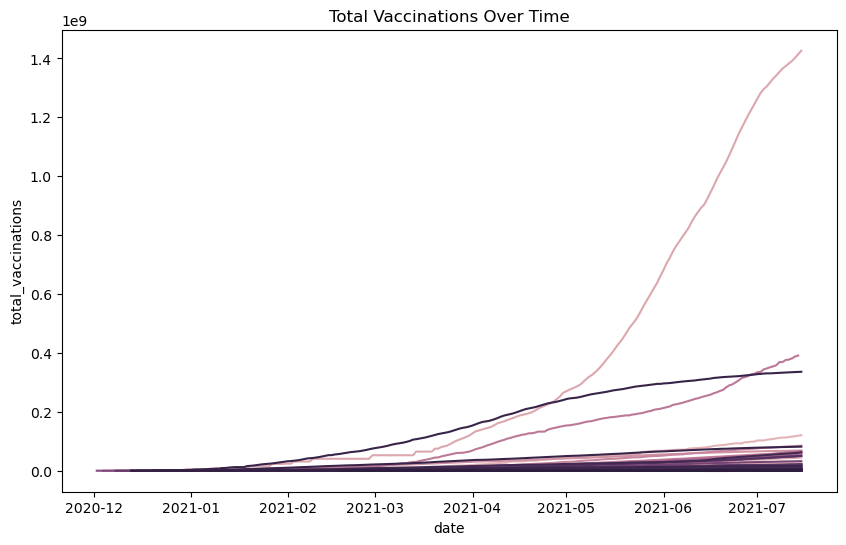

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_vaccinations, x='date', y='total_vaccinations', hue='country', legend=None)
plt.title('Total Vaccinations Over Time')
plt.show()

## Prepare Data for Machine learning

In [26]:
X = df_vaccinations[['country', 'month', 'day_of_week', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred']]
y = df_vaccinations['total_vaccinations']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train your model

In [28]:
rf_model = RandomForestRegressor()


In [32]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
best_rf_model = grid_search.best_estimator_


## Test the model and show the metrics

In [ ]:
y_pred = best_rf_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Vaccinations")
plt.show()